In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

drive.mount('/content/drive')
dir = "/content/drive/My Drive/weather.csv"

KeyboardInterrupt: ignored

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [ ]:
df = pd.read_csv(dir, encoding='utf-8', index_col=False, parse_dates=[0])

In [ ]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [ ]:
res = df.groupby(pd.Grouper(key="Day", freq="Y"))['t'].mean()
print('Самый теплый год:', res.idxmax().year, 'год')
print('Самый холодный год:', res.idxmin().year, 'год')

Самый теплый год: 2015 год
Самый холодный год: 2012 год


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [ ]:
jan = df[df.t >= 0]
jan = jan[jan.Day.dt.month == 1]
res = jan.groupby(pd.Grouper(key="Day", freq="Y"))['t'].count()
print('Наибольшее число дней с положительной температурой в январе:',\
          res.idxmax().year, 'год')

Наибольшее число дней с положительной температурой в январе: 2008 год


**3.** В каком году было самое холодное лето (по средней температуре)

In [ ]:
summer = df[(df.Day.dt.month >= 6) & (df.Day.dt.month <= 8)]
res = summer.groupby(pd.Grouper(key="Day", freq="Y"))['t'].mean()
print('Самое холодное лето:',res.idxmin().year, 'год')

Самое холодное лето: 2008 год


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [ ]:
temperature = np.array(df.t)
temperature = list(abs(temperature[1:] - temperature[:-1]))
idx = temperature.index(max(temperature))
str(df.Day[idx].date())

'2014-05-26'

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

Text(0.5, 0, 'Средняя температура')

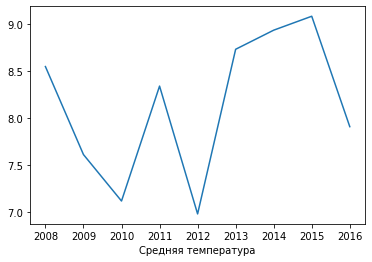

In [ ]:
X = np.arange(2008,2017)
res = df.groupby(pd.Grouper(key="Day", freq="Y"))['t'].mean()
plt.plot(X, res.values)
plt.xlabel('Год')
plt.xlabel('Средняя температура')